# Vorlesung

## Konfiguration und Python-Pakete

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Gradientenverfahren

Wir betrachten den Fall einer Minimierung ohne Nebenbedingungen und verwenden dafür ein einfaches [Gradientenverfahren](https://de.wikipedia.org/wiki/Gradientenverfahren), nämlich das **Verfahren des steilsten Abstiegs**. Nachteil: oftmals sehr langsam. 

### Erster Versuch

Wir betrachten die Minimierung einer $n$-dimensionalen Funktion $y = f(x) = f(x_1, x_2, \ldots, x_n)$. Das Argument $x$ ist hier also ein $n$-dimensionaler Vektor, den wir als Punkt im $\mathbb{R}^n$ interpretieren. 
Am Startpunkt $x_0$ bestimmen wir den Gradienten 

$$\nabla f(x_0) = \begin{pmatrix}\frac{\partial f}{\partial x_1}(x_0) \\ \frac{\partial f}{\partial x_2}(x_0) \\ \vdots \\ \frac{\partial f}{\partial x_n}(x_0) \end{pmatrix}.$$

Der Gradient bei $x_0$ zeigt in die Richtung der stärksten Zunahme von $f$ bei $x_0$. Der negative Gradient $-\nabla f(x_0)$ zeigt somit in die Richtung der stärksten Abnahme von $f$ bei $x_0$. 
Da wir ein Minimum finden wollen, entschließen wir uns, vom Startpunkt den Schritt $-\nabla f(x_0)$ in die Richtung des steilsten Abstiegs zu gehen und landen danach beim Punkt 

$$x_1 = x_0 - \nabla f(x_0).$$

Diesen Vorgehensweise wiederholen wir solange, bis die Folge von Punkten $x_0, x_1, x_2, \ldots$ sich nicht mehr (viel) ändert und daher $\nabla f$ beim letzten Punkt $x_N$ klein (genug) ist. Achtung: Aus $\nabla f(p) = 0$ an einem Punkt $p \in \mathbb{R}^n$ folgt nicht zwingend, dass $p$ ein Minimum ist. Wir erhalten aus dem Verfahren also "nur" Kandidaten für Minima.

**1-dim. Beispiele:**

$$\begin{align}
f(x)  &= 0.75(x - 3)^2 + 1 \\
f'(x) &= 1.5(x - 3)
\end{align}$$

In [2]:
def f(x):
    return 0.75*(x - 3)**2 + 1

def grad_f(x):
    return 1.5*(x - 3)

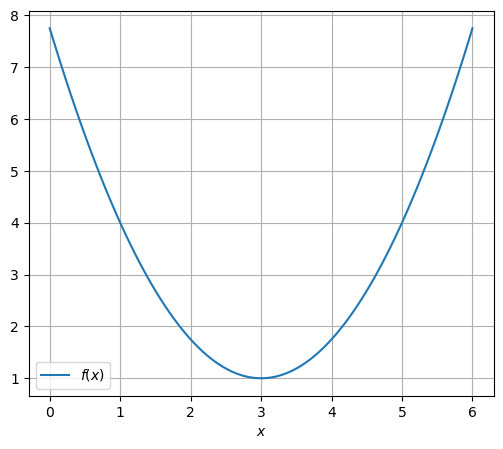

In [3]:
x_plot = np.linspace(0, 6, num=100)

plt.figure(figsize=(6, 5))
plt.plot(x_plot, f(x_plot), label='$f(x)$')
plt.xlabel('$x$')
plt.legend()
plt.grid(True)

In [4]:
eps = 1e-3  # x-Genauigkeit und Genauigkeit für Gradienten
K   = 20    # maximale Anzahl an Iterationsschritten

x = [5.5]   # Startstelle am Beginn der Liste der besuchten Stellen

k = 0
while k < K:
    x_new = x[k] - grad_f(x[k])
    x.append(x_new)
    k += 1
    if np.abs(x[k] - x[k-1]) < eps:
        break
print(f"letzte Stelle x[{k}] = {x[k]:.16f}")

letzte Stelle x[13] = 2.9996948242187500


In [5]:
for k, x_k in enumerate(x):
    print(f"x[{k:2.0f}] ={x_k:20.16f}")

x[ 0] =  5.5000000000000000
x[ 1] =  1.7500000000000000
x[ 2] =  3.6250000000000000
x[ 3] =  2.6875000000000000
x[ 4] =  3.1562500000000000
x[ 5] =  2.9218750000000000
x[ 6] =  3.0390625000000000
x[ 7] =  2.9804687500000000
x[ 8] =  3.0097656250000000
x[ 9] =  2.9951171875000000
x[10] =  3.0024414062500000
x[11] =  2.9987792968750000
x[12] =  3.0006103515625000
x[13] =  2.9996948242187500


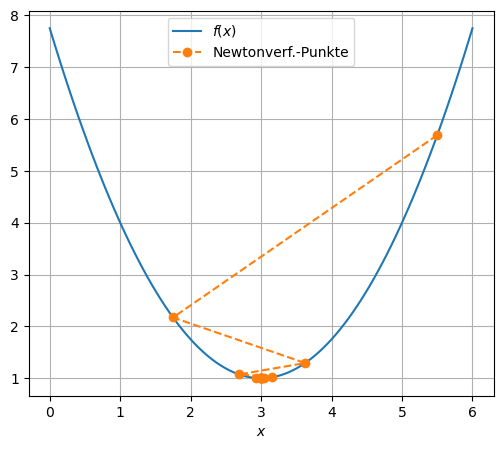

In [6]:
x_array = np.array(x)

plt.figure(figsize=(6, 5))
plt.plot(x_plot, f(x_plot), label='$f(x)$')
plt.plot(x_array, f(x_array), 'o--', label='Newtonverf.-Punkte')
plt.xlabel('$x$')
plt.legend()
plt.grid(True)

Um das Verfahren besser für verschiedene Funktionen und Startwerten vergleichen zu können, erstellen wir eine Python-Funktion:

In [7]:
def V(f, grad_f, x_0, eps=1e-3, K=20,
      print_x=True, plot_graph=True):
    """
    1-dim (zu) simples Verfahren zur Minimierung ohne
    Nebenbedingungen mittels Gradientenschritt
    """
    x = [x_0]    # Startstelle am Beginn der Liste der besuchten Stellen
    k = 0
    while k < K:
        x_new = x[k] - grad_f(x[k])
        x.append(x_new)
        k += 1
        if np.abs(x[k] - x[k-1]) < eps:
            break
    print(f"letzte Stelle x[{k}] = {x[k]:.16f}")

    if print_x:
        for k, x_k in enumerate(x):
            print(f"x[{k:2.0f}] ={x_k:20.16f}")

    if plot_graph:
        x_array = np.array(x)
        x_plot = np.linspace(np.min(x_array) - 1,
                             np.max(x_array) + 1)
        plt.figure(figsize=(6, 5))
        plt.plot(x_plot, f(x_plot), label='$f(x)$')
        plt.plot(x_array, f(x_array), 'o--', label='Newtonverf.-Punkte')
        plt.xlabel('$x$')
        plt.legend()
        plt.grid(True)

letzte Stelle x[13] = 2.9996948242187500
x[ 0] =  5.5000000000000000
x[ 1] =  1.7500000000000000
x[ 2] =  3.6250000000000000
x[ 3] =  2.6875000000000000
x[ 4] =  3.1562500000000000
x[ 5] =  2.9218750000000000
x[ 6] =  3.0390625000000000
x[ 7] =  2.9804687500000000
x[ 8] =  3.0097656250000000
x[ 9] =  2.9951171875000000
x[10] =  3.0024414062500000
x[11] =  2.9987792968750000
x[12] =  3.0006103515625000
x[13] =  2.9996948242187500


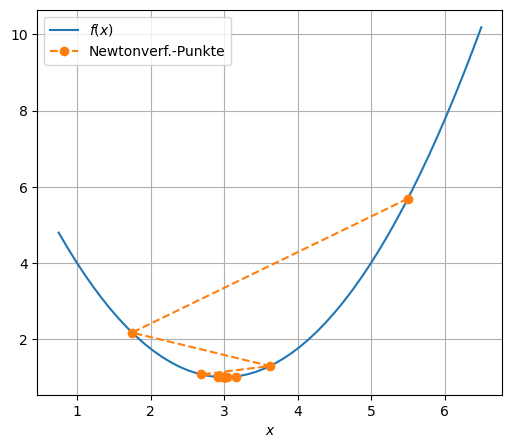

In [8]:
f      = lambda x: 0.75*(x - 3)**2 + 1
grad_f = lambda x: 1.5*(x - 3)
x_0    = 5.5

V(f, grad_f, x_0)

letzte Stelle x[20] = 2.0000000000000000
x[ 0] =  2.0000000000000000
x[ 1] = -2.0000000000000000
x[ 2] =  2.0000000000000000
x[ 3] = -2.0000000000000000
x[ 4] =  2.0000000000000000
x[ 5] = -2.0000000000000000
x[ 6] =  2.0000000000000000
x[ 7] = -2.0000000000000000
x[ 8] =  2.0000000000000000
x[ 9] = -2.0000000000000000
x[10] =  2.0000000000000000
x[11] = -2.0000000000000000
x[12] =  2.0000000000000000
x[13] = -2.0000000000000000
x[14] =  2.0000000000000000
x[15] = -2.0000000000000000
x[16] =  2.0000000000000000
x[17] = -2.0000000000000000
x[18] =  2.0000000000000000
x[19] = -2.0000000000000000
x[20] =  2.0000000000000000


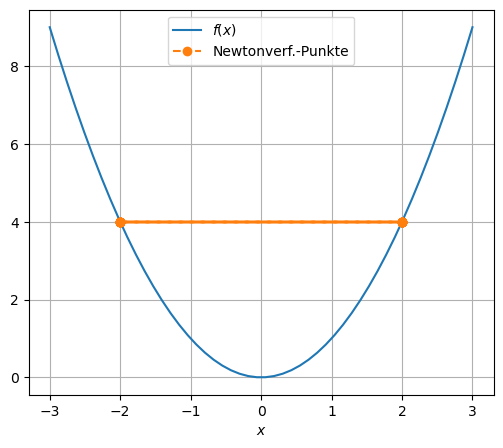

In [9]:
f      = lambda x: x**2
grad_f = lambda x: 2*x
x_0    = 2

V(f, grad_f, x_0)

letzte Stelle x[20] = 2097152.0000000000000000
x[ 0] =  2.0000000000000000
x[ 1] = -4.0000000000000000
x[ 2] =  8.0000000000000000
x[ 3] =-16.0000000000000000
x[ 4] = 32.0000000000000000
x[ 5] =-64.0000000000000000
x[ 6] =128.0000000000000000
x[ 7] =-256.0000000000000000
x[ 8] =512.0000000000000000
x[ 9] =-1024.0000000000000000
x[10] =2048.0000000000000000
x[11] =-4096.0000000000000000
x[12] =8192.0000000000000000
x[13] =-16384.0000000000000000
x[14] =32768.0000000000000000
x[15] =-65536.0000000000000000
x[16] =131072.0000000000000000
x[17] =-262144.0000000000000000
x[18] =524288.0000000000000000
x[19] =-1048576.0000000000000000
x[20] =2097152.0000000000000000


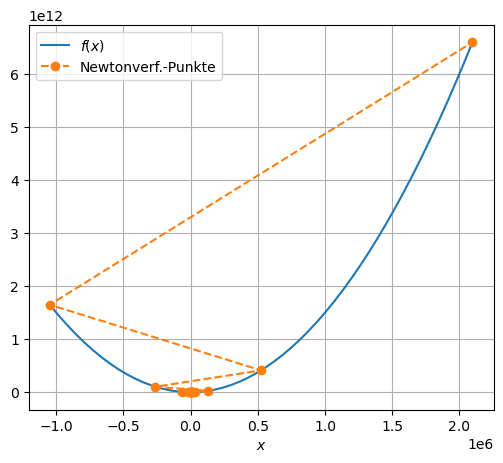

In [10]:
f      = lambda x: 1.5*x**2
grad_f = lambda x: 3*x
x_0    = 2

V(f, grad_f, x_0)

Die Schritte $-\nabla f(x_k)$ sind in den letzten zwei Beispielen zu lange. Daher modifizieren wir unseren Algorithmus durch eine Anpassung der Schrittweite, d. h. der Länge des Schritts $-\nabla f(x_k)$:

### Backtracking

Beim Backtracking halbiert man den Schritt so lange, bis der Funktionswert der neuen Stelle kleiner ist als der alte.

In [11]:
def BT_1dim(f, grad_f, x_0, eps=1e-3, K=20,
            print_x=True, plot_graph=True):
    """
    1-dim. Gradientenschritt mit Backtracking
    """
    x = [x_0]  # Startstelle am Beginn der Liste der besuchten Stellen
    k = 0
    while k < K:
        t = 1
        x_new = x[k] - t*grad_f(x[k])
        while f(x_new) >= f(x[k]):
            t = t/2
            x_new = x[k] - t*grad_f(x[k])
        x.append(x_new)
        k += 1
        if np.abs(x[k] - x[k-1]) < eps or np.abs(grad_f(x[k])) < eps:
            break
    print(f"letzte Stelle x[{k}] = {x[k]:.16f}")

    if print_x:
        for k, x_k in enumerate(x):
            print(f"x[{k:2.0f}] ={x_k:20.16f}")

    if plot_graph:
        x_array = np.array(x)
        x_plot = np.linspace(np.min(x_array) - 1,
                             np.max(x_array) + 1)
        plt.figure(figsize=(6, 5))
        plt.plot(x_plot, f(x_plot), label='$f(x)$')
        plt.plot(x_array, f(x_array), 'o--', label='NV_mit_BT.-Punkte')
        plt.xlabel('$x$')
        plt.legend()
        plt.grid(True)

letzte Stelle x[1] = 0.0000000000000000
x[ 0] =  2.0000000000000000
x[ 1] =  0.0000000000000000


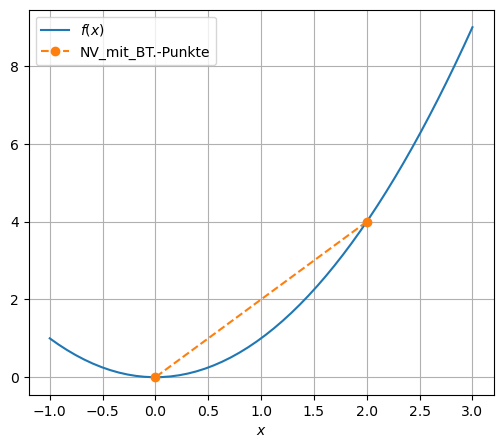

In [12]:
if 1:
    f      = lambda x: x**2
    grad_f = lambda x: 2*x
    x_0    = 2
else:
    f      = lambda x: 1.5*x**2
    grad_f = lambda x: 3*x
    x_0    = 2

BT_1dim(f, grad_f, x_0)

**2-dim. Beispiel:** 

Wir suchen Minima der Funktion $f(x,y) = e^{x + y} + e^{x - y} + e^{-x}$. Zuerst machen wir uns ein Bild, in diesem Fall einen Konturplot, der Funktion:

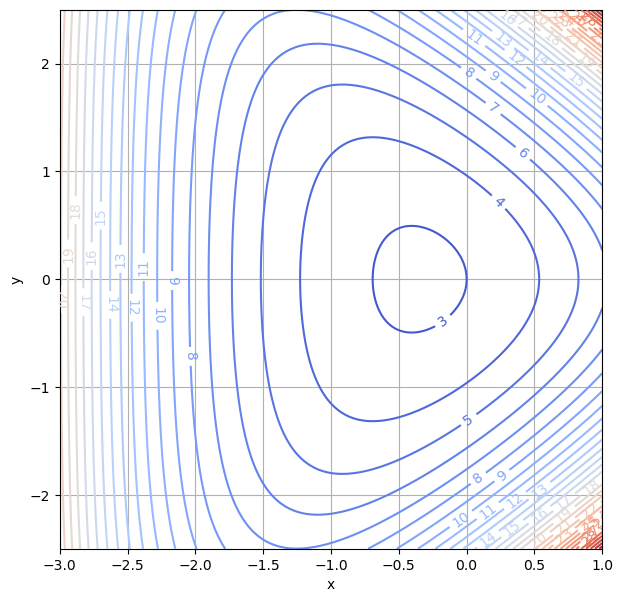

In [13]:
x = np.linspace(-3.0, 1.0, 200)
y = np.linspace(-2.5, 2.5, 200)
X, Y = np.meshgrid(x, y)
Z = np.exp(X + Y) + np.exp(X - Y) + np.exp(-X)

plt.figure(figsize=(7, 7))
cs = plt.contour(X, Y, Z, 30, cmap='coolwarm')
plt.clabel(cs, inline=1)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

Der Gradient von $f(x,y) = e^{x + y} + e^{x - y} + e^{-x}$ ist 
$\nabla f(x, y) = 
\begin{pmatrix}
e^{x + y} + e^{x - y} - e^{-x} \\
e^{x + y} - e^{x - y}
\end{pmatrix}$.

Für die Implementierung schreiben wir $p_k = (x_k,y_k)$ und verwenden 1-dim numpy-arrays.

In [14]:
def f(p_k):
    x = p_k[0]
    y = p_k[1]
    return np.exp(x + y) + np.exp(x - y) + np.exp(-x)

def grad_f(p_k):
    x = p_k[0]
    y = p_k[1]
    f_x = np.exp(x + y) + np.exp(x - y) - np.exp(-x)
    f_y = np.exp(x + y) - np.exp(x - y)
    return np.array([f_x, f_y])

In [15]:
def BT_ndim(f, grad_f, p_0, eps=1e-3, K=20):
    """
    n-dim. Gradientenschritt mit Backtracking
    """
    p = [p_0]   # Startstelle am Beginn der Liste der besuchten Stellen
    k = 0
    while k < K:
        t = 1
        p_new = p[k] - t*grad_f(p[k])
        while f(p_new) >= f(p[k]):
            t = t/2
            p_new = p[k] - t*grad_f(p[k])
        p.append(p_new)
        k += 1
        d = p[k] - p[k-1]
        abstand  = np.sqrt(np.sum([diff**2 for diff in d]))
        grad_abs = np.sqrt(np.sum([g**2 for g in grad_f(p[k])]))
        if abstand < eps or grad_abs < eps:
            break
    print(f"letzte Stelle p[{k}]  = {p[k]}")
    print(f"        mit f(p[{k}]) = {f(p[k])}")
    return p

In [16]:
p_0 = np.array([-2.0, 2.0])
p = BT_ndim(f, grad_f, p_0)

letzte Stelle p[12]  = [-3.46756442e-01  2.47315177e-06]
        mit f(p[12]) = 2.82842717203429


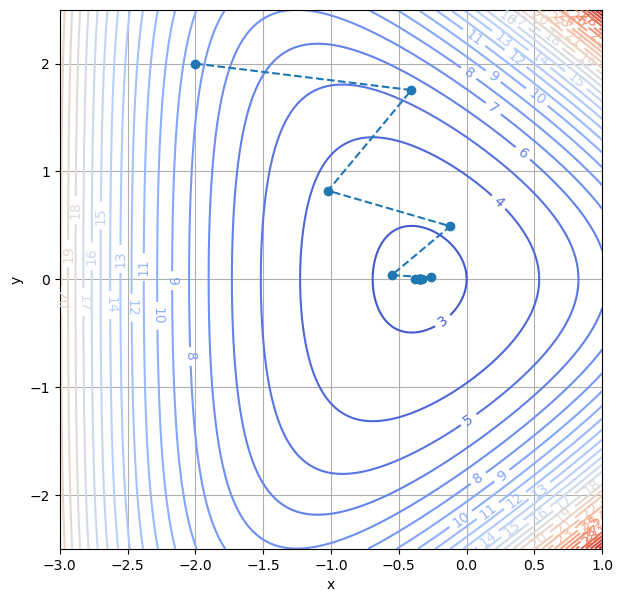

In [17]:
p_array = np.array(p)

plt.figure(figsize=(7, 7))
cs = plt.contour(X, Y, Z, 30, cmap='coolwarm')
plt.plot(p_array[:, 0], p_array[:, 1], 'o--')
plt.clabel(cs, inline=1)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

**2-dim. Beispiel:** Die [Rosenbrock-Funktion](https://en.wikipedia.org/wiki/Rosenbrock_function)
$f(x,y)=(a-x)^{2}+b(y-x^{2})^{2}$ hat ein Minimum bei $(a,a^{2})$ mit $f(a,a^2)=0$.

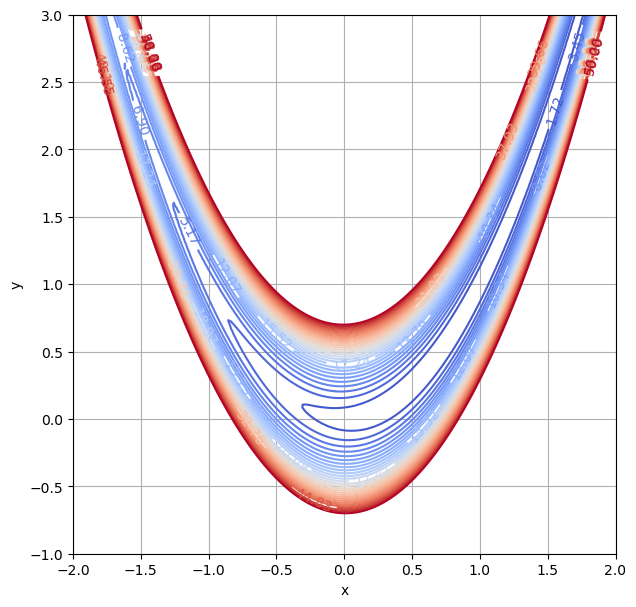

In [18]:
a = 1
b = 100

x = np.linspace(-2.0, 2.0, 200)
y = np.linspace(-1.0, 3.0, 200)
X, Y = np.meshgrid(x, y)
Z = (a - X)**2 + b*(Y - X**2)**2

plt.figure(figsize=(7, 7))
levels = np.linspace(0, 50, num=30)
cs = plt.contour(X, Y, Z, levels, cmap='coolwarm')
plt.clabel(cs, inline=1)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

Der Gradient von $f(x,y)=(a-x)^{2}+b(y-x^{2})^{2}$ ist
$\nabla f(x, y) = 
\begin{pmatrix}
-2(a - x) - 4xb(y - x^2) \\
2b(y - x^2)
\end{pmatrix}$.

In [19]:
def f(p_k):
    x = p_k[0]
    y = p_k[1]
    return (a - x)**2 + b*(y - x**2)**2

def grad_f(p_k):
    x = p_k[0]
    y = p_k[1]
    f_x = -2*(a - x) - 4*x*b*(y - x**2)
    f_y = 2*b*(y - x**2)
    return np.array([f_x, f_y])

In [20]:
p_0 = np.array([-1.5, 1.95])
p = BT_ndim(f, grad_f, p_0)

letzte Stelle p[9]  = [1.71515212 2.94477353]
        mit f(p[9]) = 0.5123586641999825


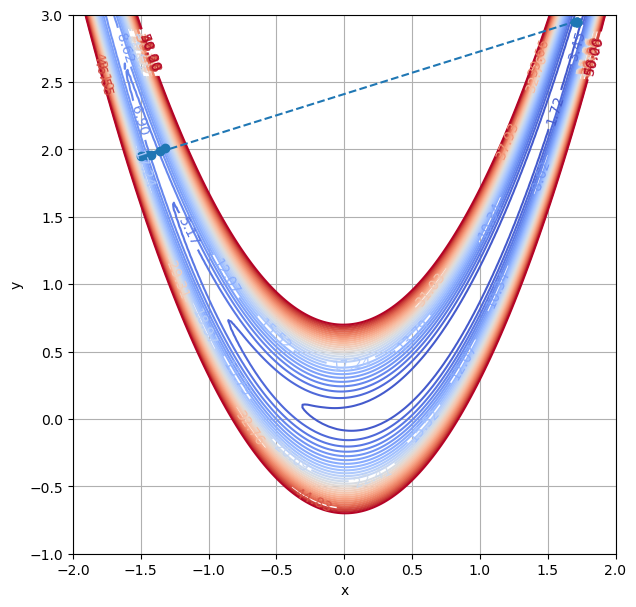

In [21]:
p_array = np.array(p)
plt.figure(figsize=(7, 7))
levels = np.linspace(0, 50, num=30)
cs = plt.contour(X, Y, Z, levels, cmap='coolwarm')
plt.plot(p_array[:, 0], p_array[:, 1], 'o--')
plt.clabel(cs, inline=1)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)

Unseren Algorithmus konvergiert nicht zum Minimum. Ausgeklügeltere Algorithmen schaffen das. Es wird auf folgende sehr kleine Auswahl an **weiterführender Literatur** verwiesen:

- Nocedal, Jorge; Wright, S. (2006): Numerical Optimization. 2. Aufl., Springer-Verlag.
- Vandenberghe, Lieven: lecture notes to the course [Applied Numerical Computing](http://www.seas.ucla.edu/~vandenbe/ee133a.html) at University of California, Los Angeles